<a href="https://colab.research.google.com/github/ChhaviC/comp3132/blob/main/LabWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to deep learning for computer vision

## Import packages

In [40]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Import MNIST DataSet

In [41]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Do some sanity check on the data**
- what is the shape of train and test set and the corresponding labels?
- How many data points are there in train and test set?
- What is the range of labels? Are they one hot encoded or they are just numbers?
- Print a sample data point from train
- show the sample datapoint with `imshow` (pass cmap="gray" argument to see the image in black and white)  

In [42]:
#TODO: your sanity checks for imported dataset

## Data preprocessing

In [43]:
# Reshape the training images to have a shape of (60000, 28, 28, 1),
# where 60000 is the number of images,
# 28x28 is the image size,
# and 1 represents the single color channel (grayscale).
train_images = train_images.reshape((60000, 28, 28, 1))

# Convert pixel values from integers (0-255) to floating-point numbers (0.0-1.0)
# for better model performance.
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

## Part A: Introduction to convnets

**Visualizing the conv operarion 3-chanel images**
- image size = (5 x 5 x 3)
- kernel_size = 3
- stride = 1
- padding = no padding

In [44]:
from IPython.display import display, HTML

gif_url = "https://raw.githubusercontent.com/PyDataGBC/PyML2025/main/LabWeek11/assets/Conv2d_0p_1s_3inCh.gif"
display(HTML(f'<img src="{gif_url}" width="600" height="400">'))  # Adjust size as needed

**Instantiating a small convnet**




![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek11/assets/image.png)

**Note:** Suppose n1=32 and n2=64

**We can instantiate the model in TensorFlow in two ways.**

**Approach 1: Sequential API**

In [45]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

**Approach 2: Functioanl API**
- In Keras' functional API, each layer acts like a function that transforms an `input` tensor.
- When you pass inputs through multiple layers, Keras records the entire sequence of transformations.
- `model = keras.Model(inputs, outputs)` connects the dots, forming a complete model from `inputs` to `outputs`.

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

# each layer acts like a function
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Sequential API is easier however with functioal API non-Sequential Connections Allowed: You can create models with branches, residual connections (like ResNet), or multi-input/multi-output structures.

**Displaying the model's summary**

In [47]:
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

**Instantiate your own model with the following architecture and then display the summary of the model**

- Input layer
- Conv2D with `filter`=32 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=64 and `kernel_size`=3
- MaxPooling2d with `pool_size`=2
- Conv2D with `filter`=128 and `kernel_size`=3
- Flatten layer
- Output layer (for 10 classes)

**Note:** Use functioal API to define your model


In [48]:
#your code here
from tensorflow.keras import layers, models, Input

# Define the input
inputs = Input(shape=(28, 28, 1))

# First Conv + MaxPooling
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

# Second Conv + MaxPooling
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Third Conv
x = layers.Conv2D(128, (3, 3), activation='relu')(x)

# Flatten and Output layer
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling and Training the convnet on MNIST images**

**Note 1:** Use `loss="sparse_categorical_crossentropy"`

**Note 2:** Train for 5 `epochs` with `batch_size`=64

In [50]:
#your code here
# Preprocess data (reshape and normalize)
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5070 - loss: 1.3849 - val_accuracy: 0.9223 - val_loss: 0.2685
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9098 - loss: 0.2929 - val_accuracy: 0.9600 - val_loss: 0.1429
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9502 - loss: 0.1614 - val_accuracy: 0.9718 - val_loss: 0.1010
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9629 - loss: 0.1185 - val_accuracy: 0.9758 - val_loss: 0.0837
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9713 - loss: 0.0936 - val_accuracy: 0.9782 - val_loss: 0.0782


**Evaluating the convnet**

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.0938
Test accuracy: 0.973


## Part B: Training a convnet from scratch on a small dataset

**In this [Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats/overview), you'll write an algorithm to classify whether images contain either a dog or a cat (binary classification - 0: Cat, 1: Dog).**

**Try to get the accuracy above 80%**

### Downloading the data

We need to load `kaggle.json` (your Kaggle API key file). This is necessary to configure the Kaggle API for downloading datasets or interacting with Kaggle from the command line.

**TODO:** Get your API key from Kaggle

**Steps to Download `kaggle.json`**
1. Go to [Kaggle](https://www.kaggle.com/)

    - Visit Kaggle and log in to your account.

2. Go to API Settings

    - Click on your profile picture (top-right corner).
    - Select `Setting` from the dropdown menu.
    - Select `Account` tab
    - Scroll down to the "API" section.

3. Download API Key

  - Click "Create New API Token" (or "Generate New Token" if you already have one). This will download a file named kaggle.json to your computer.

In [52]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chhavichhabraa","key":"29e664deef5fc17f57a00035cb217d16"}'}

In [62]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**TODO:** Go to [Dogs Vs Cats competion page](https://www.kaggle.com/c/dogs-vs-cats/overview) and then `Data` tab and **join the competition.**

**Note_1:** It's an important step otherwise you won't be able to download the data.

**Note_2:** You may need to verify your phone number to join the competition. In that case go to `settings` in Kaggle and then verify your phone number.

In [63]:
!kaggle competitions download -c dogs-vs-cats

In [64]:
!unzip -qq dogs-vs-cats.zip

In [65]:
!unzip -qq train.zip

### Data preprocessing (For this section just run the cells)

**Copying images to training, validation, and test directories**

In [66]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir,exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

**Using `image_dataset_from_directory` to read images**

In [67]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Displaying the the data and labels yielded by the `Dataset`

`train_dataset`, `validation_dataset`, and `test_dataset` behave like a **generator** in the sense that it **yields data lazily** when iterated over, instead of loading everything into memory at once.

In [68]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    sample_batch = data_batch
    sample_labels = labels_batch
    break # break the for-loop because we just want one batch

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Explain each element of the data batch shape tuple**

your answer: ???

label tf.Tensor(0, shape=(), dtype=int32)


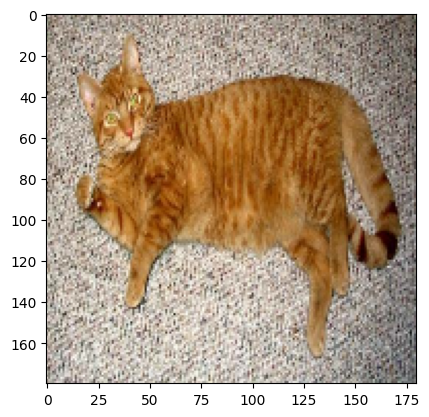

In [69]:
print("label", sample_labels[10])
plt.imshow(sample_batch[10].numpy().astype("uint8"))

**TODO: Visualize some other samples from the batch with their corresponding labels.**

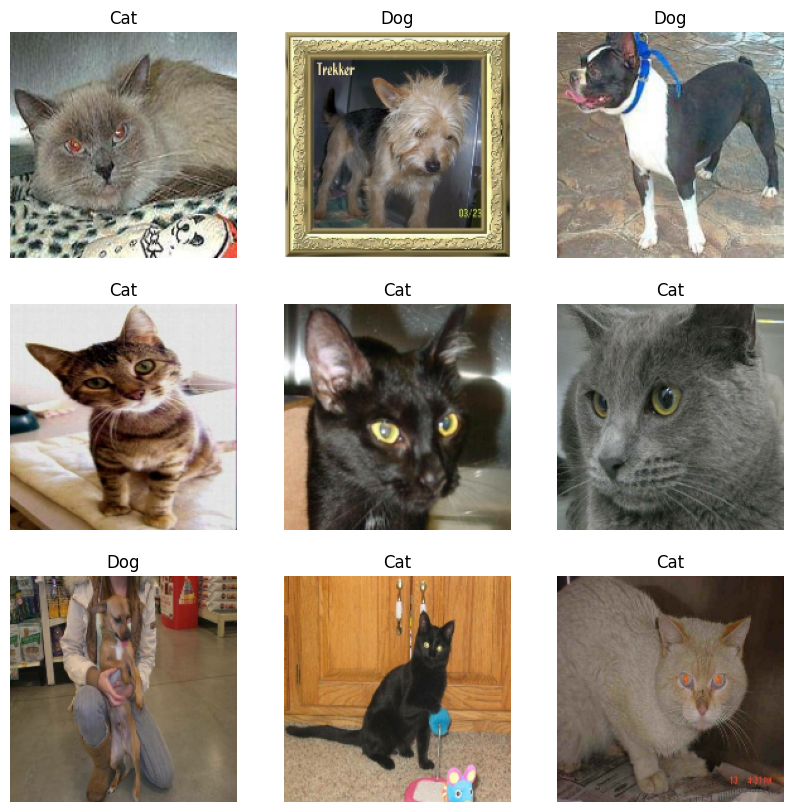

In [70]:
#your code here
# Display a few images and their labels from a single batch
import matplotlib.pyplot as plt

# Get one batch from the train_dataset
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = "Dog" if labels[i] == 1 else "Cat"
        plt.title(label)
        plt.axis("off")
    plt.show()


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [71]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#TODO: Add here a Conv2D with filters=64, kernel_size=3

#TODO: Add here MaxPooling2d

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

**Compile the model**

Compile the model for the binary classification task.

**Note:** Make sure you pass `metrics=["accuracy"]` as an argument. Otherwise you get error when you plot the history.

In [72]:
# your code here
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


**Fitting the model using a `Dataset`**

In [73]:
#This is a callback that saves the model during training.
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", #The model will be saved to this file.
        save_best_only=True,  # Only saves the model if the validation loss (val_loss) improves
        monitor="val_loss")   # The model checkpointing is based on the validation loss,
                              # whenever val_loss decreases, the model is saved.

]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5298 - loss: 0.8083 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5356 - loss: 0.6908 - val_accuracy: 0.5510 - val_loss: 0.6854
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5865 - loss: 0.6843 - val_accuracy: 0.5480 - val_loss: 0.6782
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6233 - loss: 0.6514 - val_accuracy: 0.6390 - val_loss: 0.6185
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.6606 - loss: 0.6188 - val_accuracy: 0.6630 - val_loss: 0.6107
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6671 - loss: 0.6054 - val_accuracy: 0.6630 - val_loss: 0.6091
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6926 - loss: 0.5870 - val_accuracy: 0.6230 - val_loss: 0.6746
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7227 - loss: 0.5586 - val_accuracy: 0.6440 -

**Displaying curves of loss and accuracy during training**

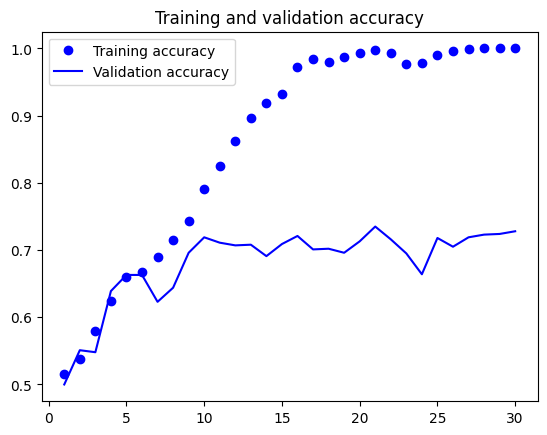

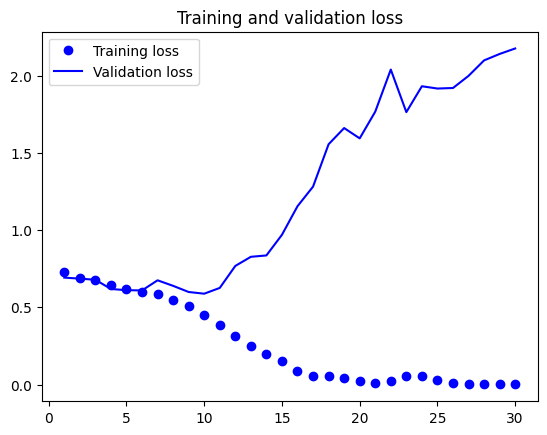

In [74]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [76]:
test_model = keras.models.load_model("convnet_from_scratch.keras")

#TODO: Evaluate the test_model
# Evaluate the model on the test set
test_loss, test_acc = test_model.evaluate(test_dataset)

print(f" Test Accuracy: {test_acc:.4f}")
print(f" Test Loss: {test_loss:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6984 - loss: 0.6252
 Test Accuracy: 0.6960
 Test Loss: 0.6282


- **What is your test accuracy?**

- **Does you model overfit?**

you answer: ???

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [77]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

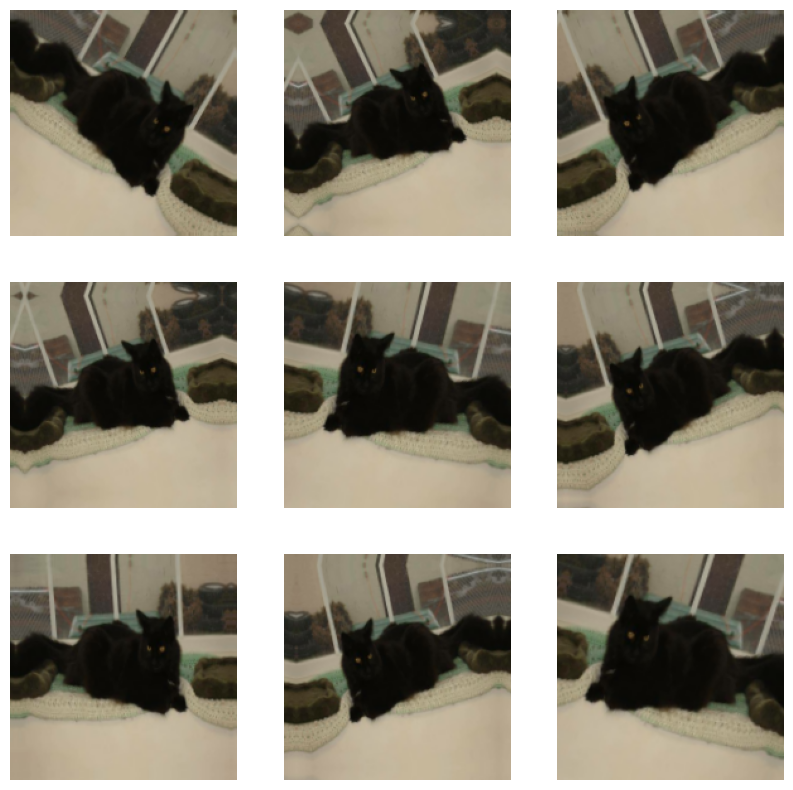

In [78]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset:
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
    break

**Defining a new convnet that includes image augmentation and dropout**

In [79]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)         #This line is new - add more data to prevent overfitting
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)            #This line is new - to prevent overfitting
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

Train the new model for 100 epochs and save it in `convnet_from_scratch_with_augmentation.keras` path.

In [80]:
#your code here
# Define a checkpoint callback to save the model
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "convnet_from_scratch_with_augmentation.keras",
    save_best_only=True
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[checkpoint_cb]
)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5292 - loss: 0.7501 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5288 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5386 - loss: 0.6955 - val_accuracy: 0.5090 - val_loss: 0.6865
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5738 - loss: 0.6816 - val_accuracy: 0.5020 - val_loss: 0.6897
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5712 - loss: 0.6817 - val_accuracy: 0.5460 - val_loss: 0.6796
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.5996 - loss: 0.6682 - val_accuracy: 0.6270 - val_loss: 0.6560
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6149 - loss: 0.6636 - val_accuracy: 0.6500 - val_loss: 0.6248
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6335 - loss: 0.6491 - val_accuracy: 0.

**Plot curves of loss and accuracy during training**

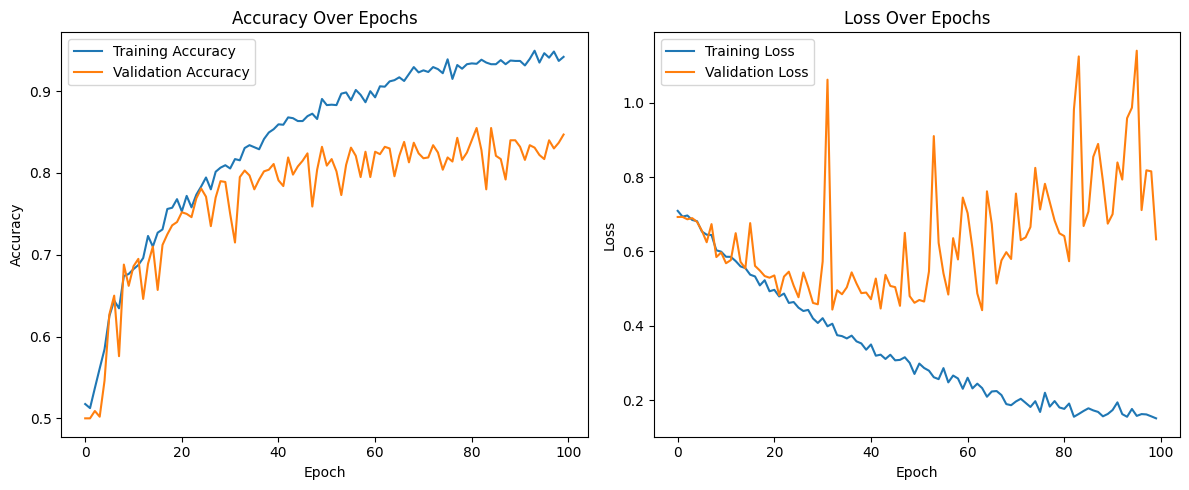

In [81]:
#your code here
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
```````````````````````````````````

**Evaluating the model on the test set**

In [82]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8254 - loss: 0.4945
Test accuracy: 0.828


**What is your test accuracy after using data augmentation and dropout?**

your answer: ???